## Python Basic

In [1]:
a = 3
b = 2
a + b

5

## 證交所網路爬蟲

In [2]:
import requests
url = 'https://www.twse.com.tw/exchangeReport/MI_INDEX?response=json&date=20190628&type=ALLBUT0999&_=1561775069945'
res = requests.get(url)
res

<Response [200]>

In [5]:
# .json => 將 JSON 資料轉換為 Python 字典
jd = res.json()

In [7]:
# 列出資料所有的索引
jd.keys()

dict_keys(['data4', 'fields1', 'subtitle4', 'notes4', 'data5', 'date', 'alignsStyle1', 'groups5', 'fields4', 'stat', 'alignsStyle2', 'data3', 'data1', 'fields3', 'subtitle5', 'fields2', 'alignsStyle4', 'subtitle1', 'fields5', 'alignsStyle5', 'data2', 'params', 'alignsStyle3', 'notes5'])

In [11]:
# 資料欄位
jd['fields5']

['證券代號',
 '證券名稱',
 '成交股數',
 '成交筆數',
 '成交金額',
 '開盤價',
 '最高價',
 '最低價',
 '收盤價',
 '漲跌(+/-)',
 '漲跌價差',
 '最後揭示買價',
 '最後揭示買量',
 '最後揭示賣價',
 '最後揭示賣量',
 '本益比']

In [14]:
import pandas
df = pandas.DataFrame(jd['data5'])
df.columns = jd['fields5']
df.head()

,證券代號,證券名稱,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌(+/-),漲跌價差,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量,本益比
0,0050,元大台灣50,"3,940,686","1,867","319,369,533",81.45,81.55,80.85,80.90,<p style= color:green>-</p>,0.60,80.90,246,80.95,2,0.00
1,0051,元大中型100,"6,098",7,"195,904",32.20,32.20,32.10,32.10,<p style= color:green>-</p>,0.08,32.10,1,32.20,4,0.00
2,0052,富邦科技,"107,219",11,"5,694,107",53.45,53.45,52.95,53.10,<p style= color:green>-</p>,0.35,52.95,1,53.30,10,0.00
3,0053,元大電子,"59,000",7,"2,010,260",34.17,34.17,34.01,34.01,<p style= color:green>-</p>,0.16,34.00,30,34.10,1,0.00
4,0054,元大台商50,"5,000",3,"111,080",22.20,22.31,22.19,22.31,<p style= color:red>+</p>,0.11,22.20,75,22.31,8,0.00


In [15]:
len(df)

1096

## HTTP Status Code
- https://zh.wikipedia.org/wiki/HTTP%E7%8A%B6%E6%80%81%E7%A0%81

## 日期
- https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [16]:
from datetime import datetime
datetime.now()

datetime.datetime(2019, 6, 29, 11, 0, 57, 463442)

In [17]:
datetime.now().strftime('%Y%m%d')

'20190629'

In [18]:
from datetime import timedelta
current_time = datetime.now()
for i in range(10):
    dt = current_time - timedelta(days = i)
    print(dt.strftime('%Y%m%d'))

20190629
20190628
20190627
20190626
20190625
20190624
20190623
20190622
20190621
20190620


In [24]:
from datetime import timedelta
current_time = datetime.now()
dataary = []
for i in range(2):
    dt = current_time - timedelta(days = i)
    date = dt.strftime('%Y%m%d')
    url = f'https://www.twse.com.tw/exchangeReport/MI_INDEX?response=json&date={date}&type=ALLBUT0999'
    print(url)
    res = requests.get(url)
    jd  = res.json() 
    df = pandas.DataFrame(jd['data5'])
    df.columns = jd['fields5']
    dataary.append(df)  

https://www.twse.com.tw/exchangeReport/MI_INDEX?response=json&date=20190629&type=ALLBUT0999


KeyError: 'data5'

In [25]:
from datetime import timedelta
current_time = datetime.now()
dataary = []
for i in range(2):
    dt = current_time - timedelta(days = i)
    date = dt.strftime('%Y%m%d')
    url = f'https://www.twse.com.tw/exchangeReport/MI_INDEX?response=json&date={date}&type=ALLBUT0999'
    print(url)
    res = requests.get(url)
    jd  = res.json() 
    if jd.get('data5'):
        df = pandas.DataFrame(jd['data5'])
        df.columns = jd['fields5']
        dataary.append(df)  

https://www.twse.com.tw/exchangeReport/MI_INDEX?response=json&date=20190629&type=ALLBUT0999
https://www.twse.com.tw/exchangeReport/MI_INDEX?response=json&date=20190628&type=ALLBUT0999


In [29]:
from datetime import datetime

def getStockData(date):
    url = f'https://www.twse.com.tw/exchangeReport/MI_INDEX?response=json&date={date}&type=ALLBUT0999'
    res = requests.get(url)
    jd = res.json()
    if jd.get('data5'):
        df = pandas.DataFrame(jd['data5'])
        df.columns = jd['fields5']
        df['交易日'] = datetime.strptime(date,'%Y%m%d')
        return df


In [30]:
s = '20190629'
datetime.strptime(s,'%Y%m%d')

datetime.datetime(2019, 6, 29, 0, 0)

In [31]:
getStockData('20190629')

In [33]:
#getStockData('20190628')

In [39]:
from datetime import datetime, timedelta
import time

current_date = datetime.now()
dataary = []
for i in range(30):
    dt = (current_date - timedelta(days = i)).strftime('%Y%m%d')
    df = getStockData(dt)
    dataary.append(df)
    print(i)
    time.sleep(3)



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


KeyboardInterrupt: 

## Proxies
- https://www.squidproxies.com/
- sharedproxies.com
- http://stormproxies.com
- https://luminati-china.biz

In [42]:
len(dataary)

22

In [43]:
df = pandas.concat(dataary)
len(df)

16472

In [44]:
df.head()

,證券代號,證券名稱,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌(+/-),漲跌價差,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量,本益比,交易日
0,0050,元大台灣50,"3,940,686","1,867","319,369,533",81.45,81.55,80.85,80.90,<p style= color:green>-</p>,0.60,80.90,246,80.95,2,0.00,2019-06-28
1,0051,元大中型100,"6,098",7,"195,904",32.20,32.20,32.10,32.10,<p style= color:green>-</p>,0.08,32.10,1,32.20,4,0.00,2019-06-28
2,0052,富邦科技,"107,219",11,"5,694,107",53.45,53.45,52.95,53.10,<p style= color:green>-</p>,0.35,52.95,1,53.30,10,0.00,2019-06-28
3,0053,元大電子,"59,000",7,"2,010,260",34.17,34.17,34.01,34.01,<p style= color:green>-</p>,0.16,34.00,30,34.10,1,0.00,2019-06-28
4,0054,元大台商50,"5,000",3,"111,080",22.20,22.31,22.19,22.31,<p style= color:red>+</p>,0.11,22.20,75,22.31,8,0.00,2019-06-28


In [45]:
df.tail()

,證券代號,證券名稱,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌(+/-),漲跌價差,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量,本益比,交易日
1094,9944,新麗,"332,120",132,"6,095,084",18.35,18.65,18.15,18.15,<p style= color:green>-</p>,0.20,18.15,8,18.20,2,151.25,2019-06-10
1095,9945,潤泰新,"1,331,931",818,"55,071,551",41.05,41.55,41.05,41.30,<p style= color:red>+</p>,0.60,41.30,11,41.35,3,4.37,2019-06-10
1096,9946,三發地產,"1,681,125",640,"35,065,697",20.90,21.00,20.80,20.85,<p style= color:red>+</p>,0.25,20.80,35,20.85,217,7.14,2019-06-10
1097,9955,佳龍,"3,578,460","1,652","60,731,118",16.50,17.50,16.25,16.25,<p style= color:green>-</p>,0.45,16.25,17,16.60,3,0.00,2019-06-10
1098,9958,世紀鋼,"4,252,430","2,684","297,196,438",70.10,70.70,69.10,70.10,<p style= color:red>+</p>,1.40,70.00,14,70.10,15,412.35,2019-06-10


In [46]:
df.reset_index(inplace=True)

In [47]:
df.tail()

,index,證券代號,證券名稱,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌(+/-),漲跌價差,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量,本益比,交易日
16467,1094,9944,新麗,"332,120",132,"6,095,084",18.35,18.65,18.15,18.15,<p style= color:green>-</p>,0.20,18.15,8,18.20,2,151.25,2019-06-10
16468,1095,9945,潤泰新,"1,331,931",818,"55,071,551",41.05,41.55,41.05,41.30,<p style= color:red>+</p>,0.60,41.30,11,41.35,3,4.37,2019-06-10
16469,1096,9946,三發地產,"1,681,125",640,"35,065,697",20.90,21.00,20.80,20.85,<p style= color:red>+</p>,0.25,20.80,35,20.85,217,7.14,2019-06-10
16470,1097,9955,佳龍,"3,578,460","1,652","60,731,118",16.50,17.50,16.25,16.25,<p style= color:green>-</p>,0.45,16.25,17,16.60,3,0.00,2019-06-10
16471,1098,9958,世紀鋼,"4,252,430","2,684","297,196,438",70.10,70.70,69.10,70.10,<p style= color:red>+</p>,1.40,70.00,14,70.10,15,412.35,2019-06-10


In [49]:
df[df['證券代號']=='2330'].head()

,index,證券代號,證券名稱,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌(+/-),漲跌價差,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量,本益比,交易日
409,409,2330,台積電,"28,085,212","8,987","6,715,488,371",241.50,241.50,238.00,239.00,<p style= color:green>-</p>,1.50,238.50,380,239.00,641,19.20,2019-06-28
1505,409,2330,台積電,"42,007,834","14,983","10,063,332,494",236.00,241.50,236.00,240.50,<p style= color:red>+</p>,6.00,240.00,612,240.50,469,19.32,2019-06-27
2601,409,2330,台積電,"28,770,041","13,535","6,757,991,717",235.00,236.50,234.00,234.50,<p style= color:green>-</p>,4.00,234.50,"1,537",235.00,180,18.84,2019-06-26
3697,409,2330,台積電,"29,735,283","11,130","7,118,002,390",241.00,241.50,237.00,238.50,<p style= color:green>-</p>,2.50,238.50,211,239.00,"1,361",19.16,2019-06-25
4795,410,2330,台積電,"43,460,507","17,780","10,476,936,660",241.00,242.00,240.00,241.00,X,0.00,240.50,"1,334",241.00,"2,190",19.36,2019-06-24


## Jupyter Notebook Magic
- https://ethanww.github.io/2017/05/08/jupyter%E9%AD%94%E6%B3%95%E5%91%BD%E4%BB%A4/

In [58]:
import numpy as np
df.dropna(inplace=True)
df['收盤價'] = df['收盤價'].map(lambda e: np.nan if e == '--' else float(e.replace(',','')) )

Populating the interactive namespace from numpy and matplotlib


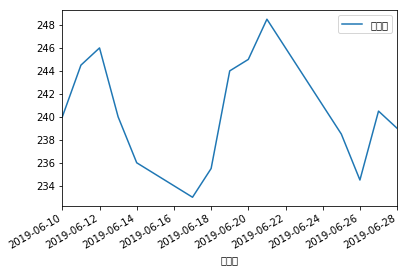

In [59]:
%pylab inline
df[df['證券代號']=='2330'].plot(x = '交易日', y = '收盤價', kind = 'line')

## Pandas DataReader
- ! pip install pandas_datareader

In [60]:
! pip install pandas_datareader

You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [62]:
from pandas_datareader import DataReader
df = DataReader('2330.TW', 'yahoo', start='2015-01-01', end='2018-01-01')
df.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-05,140.5,137.5,140.5,139.5,32046000.0,117.563866
2015-01-06,137.5,133.0,137.5,133.5,66778000.0,112.507347
2015-01-07,135.0,133.5,133.5,134.0,43703000.0,112.928734
2015-01-08,138.0,136.0,136.5,138.0,42491000.0,116.299728
2015-01-09,135.5,133.0,135.0,134.0,61558000.0,112.928734


In [63]:
from pandas_datareader import DataReader
df = DataReader(['2330.TW', '2454.TW'], 'yahoo', start='2015-01-01', end='2018-01-01')['Close']
df.head()


Symbols,2330.TW,2454.TW
Date,,
2015-01-05,139.5,462.0
2015-01-06,133.5,458.0
2015-01-07,134.0,486.5
2015-01-08,138.0,485.0
2015-01-09,134.0,488.0


## Google Trends

In [80]:
import requests
res = requests.get('https://trends.google.com/trends/api/widgetdata/multiline?hl=zh-TW&tz=-480&req=%7B%22time%22:%222014-06-29+2019-06-29%22,%22resolution%22:%22WEEK%22,%22locale%22:%22zh-TW%22,%22comparisonItem%22:%5B%7B%22geo%22:%7B%22country%22:%22TW%22%7D,%22complexKeywordsRestriction%22:%7B%22keyword%22:%5B%7B%22type%22:%22BROAD%22,%22value%22:%22%E6%84%9F%E5%86%92%22%7D%5D%7D%7D%5D,%22requestOptions%22:%7B%22property%22:%22%22,%22backend%22:%22IZG%22,%22category%22:0%7D%7D&token=APP6_UEAAAAAXRgvff6VWPc7G-hHcd46jGQdsCm1Bri2&tz=-480')
#res.text

In [64]:
#https://trends.google.com/trends/explore?date=today%205-y&geo=TW&q=%E6%84%9F%E5%86%92

In [99]:
import requests
import json
headers = {
'cookie': '__utmc=10102256; __utmz=10102256.1561773664.5.5.utmcsr=google|utmccn=(organic)|utmcmd=organic|utmctr=(not%20provided); __utma=10102256.419893392.1561557944.1561773664.1561779480.6; __utmt=1; __utmb=10102256.3.10.1561779480; SID=jQf1SJJW5JlbtypjYIjKvG1AsAMlnGAn03uNhmZrKiAJWsQXbEJpMu9FA5BebmeLQQy2rg.; HSID=AX3bFPnhtMryqNJGV; SSID=A8mfNA1V7n1HA1pZH; APISID=aXpt2tGRbvW2E5BA/Aitv0dsUpTzmOkYQ0; SAPISID=CqPgm6Iaj1V3RYO6/AQyGviVWQZaxZLRGj; ANID=AHWqTUm0e047IDmOPKF8qAFQS6geukATff75di7p5rYWDuASU0wsErqHtjH2X8Iz; NID=186=fZ4KPVWBZAcSClgN61gTdjo8RkFLVBxMNX-TgGgl3QzomJCJk5nOIIiPyTKdFhAwjODDUSEZ8RYlLSv4t0k1vZUof5TdibLGKOJ3-Z02P7Mhm7IEBZ6BEEq8i6oTVBt3Z6C5qw1xs7RPjbF3vaXfbfX5mc75UR2HwdA8jMWvT0pufHCjCn1kUEJ03nqEy0vZ6ConeBnML6gtE1PJ9JDuLZCCeUJx444oQjlv5temvzgIE26qFHJoKC7rm3jKuwJsZUI0JKFl-1cOqbr3mt0H6f_bPzgMzaVUTdgaARXFkw3PEZfq6geyftCXOfqQi7Iud4Md_LsYq7NleqikrEARe_ha5y3BKFgiw84-NJgdP0PkKbswWyVQyNPYq3j5yIqbXn6NU-rstdjwIIxx5l3rgVi0CQFnlTUs1762FLH8o9SocWfuhztiiyvOwZV-EpWPFUYuZ18; 1P_JAR=2019-6-29-3; SIDCC=AN0-TYuusCDOLkG2uc-mDa4pjgbs9TBHAgvGKatpGyGyRmyz1kMfxBu19rd9rMCjpy87JM1YhwE2',
'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36'   
}
keyword = '燒肉'
res = requests.get(f'https://trends.google.com/trends/api/explore?hl=zh-TW&tz=-480&req=%7B%22comparisonItem%22:%5B%7B%22keyword%22:%22{keyword}%22,%22geo%22:%22TW%22,%22time%22:%22today+5-y%22%7D%5D,%22category%22:0,%22property%22:%22%22%7D&tz=-480', headers = headers)
jd = json.loads(res.text.lstrip(')]}\'\n'))

In [100]:
jd['widgets'][0]['request']

{'time': '2014-06-29 2019-06-29',
 'resolution': 'WEEK',
 'locale': 'zh-TW',
 'comparisonItem': [{'geo': {'country': 'TW'},
   'complexKeywordsRestriction': {'keyword': [{'type': 'BROAD',
      'value': '燒肉'}]}}],
 'requestOptions': {'property': '', 'backend': 'IZG', 'category': 0}}

In [101]:
jd['widgets'][0]['token']

'APP6_UEAAAAAXRg0lp4DdCMT_BwX4vzJuwG4c0_MQnz3'

In [102]:
payload = {'hl': 'zh-TW',
            'tz': -480,
            'req'  : json.dumps(jd['widgets'][0]['request']),
            'token' : jd['widgets'][0]['token'],
            'tz': -480}

url = 'https://trends.google.com/trends/api/widgetdata/multiline'
res2 = requests.get(url, headers=headers, params = payload)


In [103]:
#res.text

In [104]:
jd2 = json.loads(res2.text.split('\n')[1])

In [105]:
#jd2

In [106]:
import pandas
dataary = []
for ele in jd2['default']['timelineData']:
    dataary.append([ele.get('time'), ele.get('value')[0]])


In [107]:
df = pandas.DataFrame(dataary)
df.columns = ['time', 'val']


In [108]:
df.head()

,time,val
0,1404000000,24
1,1404604800,25
2,1405209600,22
3,1405814400,25
4,1406419200,30


In [109]:
df['time'] = pandas.to_datetime(df['time'], unit='s')


In [110]:
df.set_index('time', inplace=True)
df.head()


,val
time,
2014-06-29,24
2014-07-06,25
2014-07-13,22
2014-07-20,25
2014-07-27,30


Populating the interactive namespace from numpy and matplotlib


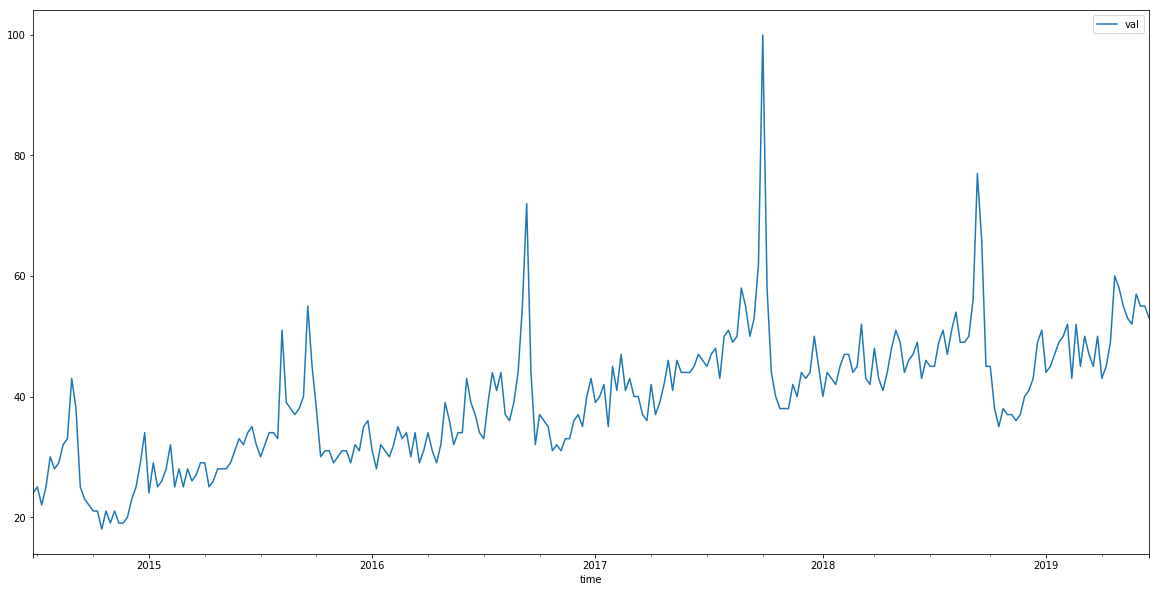

In [111]:
%pylab inline
df.plot(kind = 'line' , figsize = [20,10])


## 使用 Pytrends
- https://github.com/GeneralMills/pytrends
- pip install pytrends

In [122]:
from pytrends.request import TrendReq
keyword = '感冒'
kw_list = [keyword]
pytrends = TrendReq(hl='zh-TW', tz=-480)
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='TW', gprop='')

data = pytrends.interest_over_time()
data.head()


,感冒,isPartial
date,,
2014-06-29,28,False
2014-07-06,30,False
2014-07-13,33,False
2014-07-20,26,False
2014-07-27,29,False


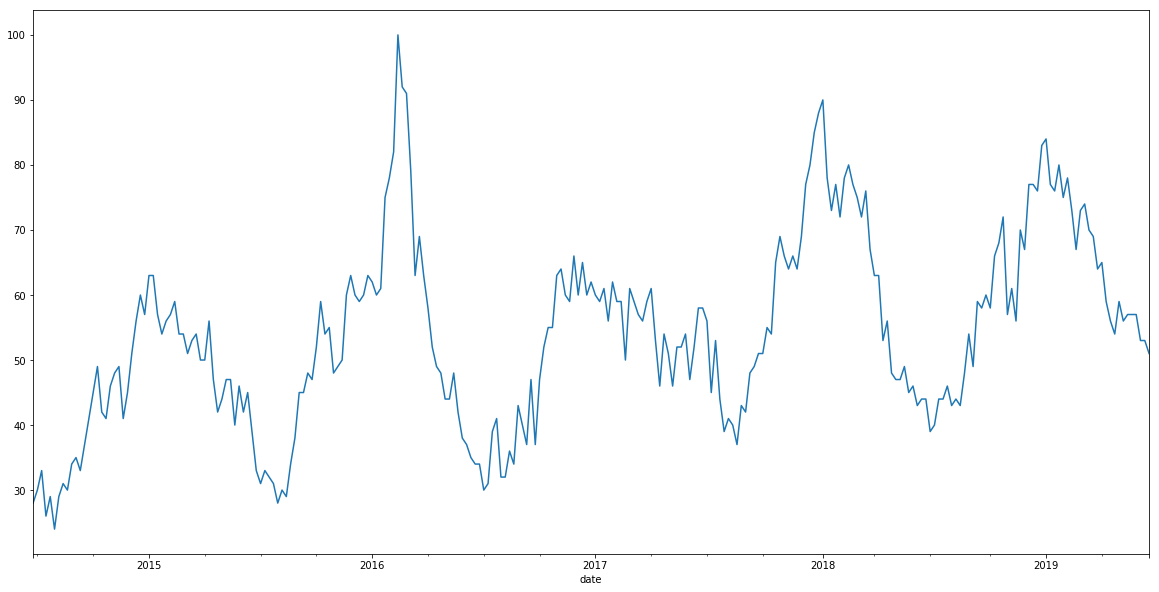

In [123]:
data[keyword].plot(kind = 'line', figsize = [20,10])

In [124]:
data['ma30'] = data[keyword].rolling(window = 30).mean()

In [129]:
from matplotlib.font_manager import fontManager
import os
 
fonts = [font.name for font in fontManager.ttflist if 
         os.path.exists(font.fname) and os.stat(font.fname).st_size>1e6] 
 
for font in fonts:
    print(font)


MingLiU-ExtB
Mishafi
Meiryo
PMingLiU
Gabriola
Microsoft JhengHei
MS PMincho
SimHei
Cambria Math
AppleGothic
Cambria
PMingLiU-ExtB
System Font
Meiryo
Arial Unicode MS
Batang
Meiryo
Gulim
Diwan Thuluth
System Font
MingLiU_HKSCS-ExtB
SimSun
Meiryo
MS Gothic
MingLiU_HKSCS
MingLiU
MS Mincho
MS PGothic
AppleMyungjo
SimSun-ExtB


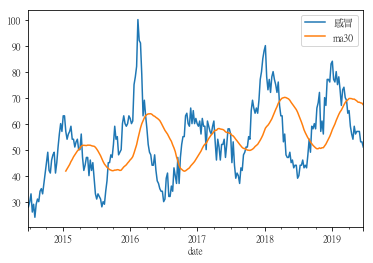

In [132]:

from pylab import * 
import matplotlib
matplotlib.rcParams['font.family'] = 'PMingLiU'
mpl.rcParams['font.sans-serif'] = ['PMingLiU']

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['PMingLiU']

data.plot(kind = 'line')

## 使用 Pandas 分析 Google Trends 與股價的關係

### 直接讀取 Github 上面的資料

In [159]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ywchiu/financepy/master/data/google_trends.csv', index_col= 'Date', parse_dates=True)
df.head()

,google
Date,
2014-06-29,28
2014-07-06,31
2014-07-13,34
2014-07-20,26
2014-07-27,27


### 使用 PyTrends 取得資料 (Method2)

In [133]:
from pytrends.request import TrendReq

keyword = '感冒'
kw_list = [keyword]
pytrends = TrendReq(hl='zh-TW', tz=-480)

pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='TW', gprop='')

data = pytrends.interest_over_time()

data.head()


,感冒,isPartial
date,,
2014-06-29,29,False
2014-07-06,30,False
2014-07-13,34,False
2014-07-20,28,False
2014-07-27,31,False


In [135]:
data = data[[keyword]]
data.head()

,感冒
date,
2014-06-29,29
2014-07-06,30
2014-07-13,34
2014-07-20,28
2014-07-27,31


In [136]:
data.columns

Index(['感冒'], dtype='object')

In [137]:
data.columns = ['google']

In [138]:
data.head()

,google
date,
2014-06-29,29
2014-07-06,30
2014-07-13,34
2014-07-20,28
2014-07-27,31


In [140]:
data.index.name = 'Date'

In [141]:
data.head()

,google
Date,
2014-06-29,29
2014-07-06,30
2014-07-13,34
2014-07-20,28
2014-07-27,31


In [146]:
from datetime import datetime
datetime.strptime('2014-06-29','%Y-%m-%d').strftime('%a')

'Sun'

In [147]:
datetime.strptime('2014-06-30','%Y-%m-%d').strftime('%a')

'Mon'

In [148]:
data.index

DatetimeIndex(['2014-06-29', '2014-07-06', '2014-07-13', '2014-07-20',
               '2014-07-27', '2014-08-03', '2014-08-10', '2014-08-17',
               '2014-08-24', '2014-08-31',
               ...
               '2019-04-21', '2019-04-28', '2019-05-05', '2019-05-12',
               '2019-05-19', '2019-05-26', '2019-06-02', '2019-06-09',
               '2019-06-16', '2019-06-23'],
              dtype='datetime64[ns]', name='Date', length=261, freq=None)

In [149]:
data.index + timedelta(days = 1)

DatetimeIndex(['2014-06-30', '2014-07-07', '2014-07-14', '2014-07-21',
               '2014-07-28', '2014-08-04', '2014-08-11', '2014-08-18',
               '2014-08-25', '2014-09-01',
               ...
               '2019-04-22', '2019-04-29', '2019-05-06', '2019-05-13',
               '2019-05-20', '2019-05-27', '2019-06-03', '2019-06-10',
               '2019-06-17', '2019-06-24'],
              dtype='datetime64[ns]', name='Date', length=261, freq='W-MON')

In [150]:
data.index = data.index + timedelta(days = 1)

In [151]:
data.head()

,google
Date,
2014-06-30,29
2014-07-07,30
2014-07-14,34
2014-07-21,28
2014-07-28,31


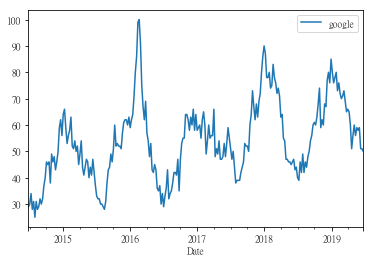

In [157]:
data.plot(kind ='line')

In [152]:
from pandas_datareader import DataReader
?DataReader

In [154]:
stock = DataReader('9919.TW', 'yahoo', start='2014-06-01', end='2018-12-31')
stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-06-03,14.50,14.40,14.45,14.50,107000.0,13.023062
2014-06-04,14.50,14.45,14.50,14.45,204000.0,12.978155
2014-06-05,14.45,14.35,14.45,14.45,213000.0,12.978155
2014-06-06,14.70,14.40,14.45,14.40,291000.0,12.933248
2014-06-09,14.50,14.40,14.50,14.50,222000.0,13.023062


In [156]:
stock = stock[['Close']]

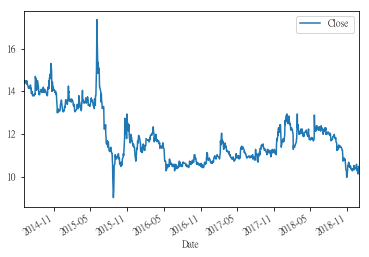

In [158]:
stock.plot(kind ='line')

In [160]:
data.head()

,google
Date,
2014-06-30,29
2014-07-07,30
2014-07-14,34
2014-07-21,28
2014-07-28,31


In [161]:
stock.head()

,Close
Date,
2014-06-03,14.50
2014-06-04,14.45
2014-06-05,14.45
2014-06-06,14.40
2014-06-09,14.50


In [162]:
# SELECT * FROM 9919.TW INNER JOIN GOOGLE ON 9919.TW.Date = GOOGLE.Data 
m = pd.merge(data, stock, left_index=True, right_index=True)
m.head()

,google,Close
Date,,
2014-06-30,29,14.15
2014-07-07,30,14.30
2014-07-14,34,13.95
2014-07-21,28,13.85
2014-07-28,31,13.90


Populating the interactive namespace from numpy and matplotlib


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['datetime', 'info', 'fft', 'random', 'power', 'linalg']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11ab90b38>,
      dtype=object)

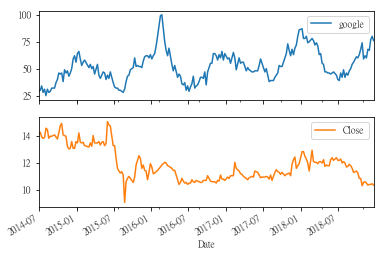

In [163]:
%pylab inline 
m.plot(subplots=True)

In [164]:
m.corr()

,google,Close
google,1.000000,-0.173206
Close,-0.173206,1.000000


In [165]:
m['google_mean'] = m['google'].rolling(window = 3).mean()

In [166]:
m.head()

,google,Close,google_mean
Date,,,
2014-06-30,29,14.15,NaN
2014-07-07,30,14.30,NaN
2014-07-14,34,13.95,31.000000
2014-07-21,28,13.85,30.666667
2014-07-28,31,13.90,31.000000


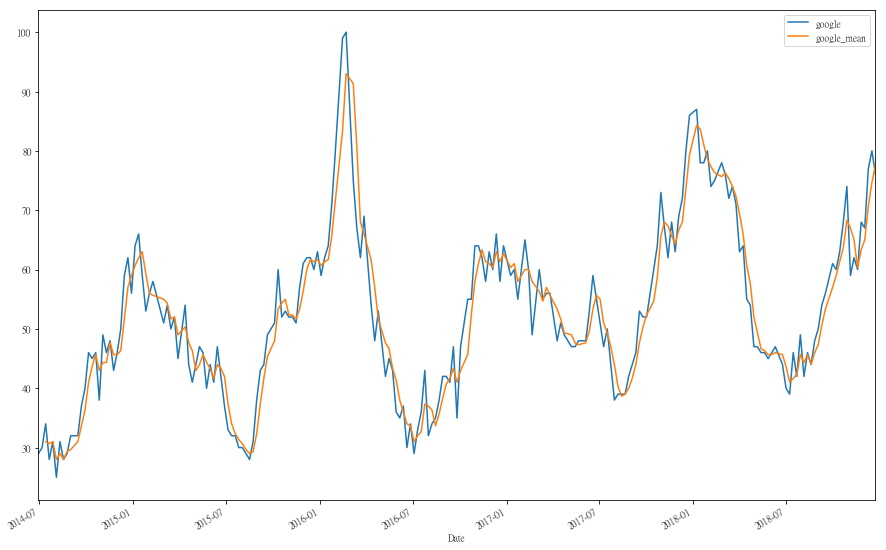

In [168]:
m[['google', 'google_mean']].plot(kind = 'line', figsize = [15,10])

In [169]:
m['google_mean'] = m['google_mean'].shift(1)
m.head()

,google,Close,google_mean
Date,,,
2014-06-30,29,14.15,NaN
2014-07-07,30,14.30,NaN
2014-07-14,34,13.95,NaN
2014-07-21,28,13.85,31.000000
2014-07-28,31,13.90,30.666667


In [170]:
m['order'] = 0

In [171]:
# 黃金交叉做多
m.loc[m['google'] > m['google_mean'], 'order'] = 1


In [172]:
# 死亡交叉做空
m.loc[m['google'] < m['google_mean'], 'order'] = -1


In [174]:
m.head()

,google,Close,google_mean,order
Date,,,,
2014-06-30,29,14.15,NaN,0
2014-07-07,30,14.30,NaN,0
2014-07-14,34,13.95,NaN,0
2014-07-21,28,13.85,31.000000,-1
2014-07-28,31,13.90,30.666667,1


In [175]:
m['ret_stock'] = m['Close'].pct_change()
m.head()


,google,Close,google_mean,order,ret_stock
Date,,,,,
2014-06-30,29,14.15,NaN,0,NaN
2014-07-07,30,14.30,NaN,0,0.010601
2014-07-14,34,13.95,NaN,0,-0.024476
2014-07-21,28,13.85,31.000000,-1,-0.007168
2014-07-28,31,13.90,30.666667,1,0.003610


In [177]:
(14.3 - 14.15) / 14.15

0.010600706713780944

In [178]:
(13.95 - 14.3) / 14.3

-0.024475524475524573

In [179]:
m['ret_stock']= m['ret_stock'].shift(-1)
m.head()

,google,Close,google_mean,order,ret_stock
Date,,,,,
2014-06-30,29,14.15,NaN,0,0.010601
2014-07-07,30,14.30,NaN,0,-0.024476
2014-07-14,34,13.95,NaN,0,-0.007168
2014-07-21,28,13.85,31.000000,-1,0.003610
2014-07-28,31,13.90,30.666667,1,0.050360


In [180]:
m['ret_google'] = m['order'] * m['ret_stock']
m.head()


,google,Close,google_mean,order,ret_stock,ret_google
Date,,,,,,
2014-06-30,29,14.15,NaN,0,0.010601,0.00000
2014-07-07,30,14.30,NaN,0,-0.024476,-0.00000
2014-07-14,34,13.95,NaN,0,-0.007168,-0.00000
2014-07-21,28,13.85,31.000000,-1,0.003610,-0.00361
2014-07-28,31,13.90,30.666667,1,0.050360,0.05036


In [183]:
ret = pd.concat([(1 + m['ret_google']).cumprod(), (1 + m['ret_stock']).cumprod()], axis = 1)


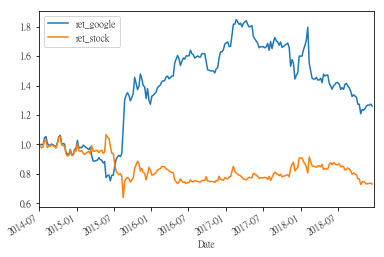

In [185]:
ret.plot(kind = 'line')

In [186]:
(1 + m['ret_stock']).cumprod().tail()

Date
2018-11-26    0.734982
2018-12-03    0.734982
2018-12-10    0.738516
2018-12-17    0.731449
2018-12-24         NaN
Name: ret_stock, dtype: float64

In [187]:
(1 + m['ret_google']).cumprod().tail()

Date
2018-11-26    1.267501
2018-12-03    1.267501
2018-12-10    1.273595
2018-12-17    1.261407
2018-12-24         NaN
Name: ret_google, dtype: float64

## 建立 Google Trends 與 股價的分析流程

              Google     Stock
Date                          
2018-11-26  0.718385  0.765811
2018-12-03  0.779544  0.700613
2018-12-10  0.740394  0.735799
2018-12-17  0.737270  0.738904
2018-12-24       NaN       NaN


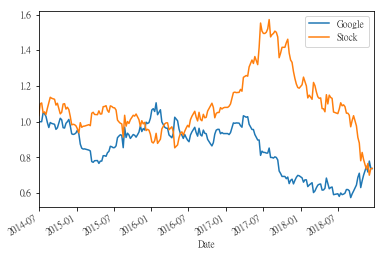

In [198]:
from pytrends.request import TrendReq
from pandas_datareader import DataReader


def getGoogleTrends(keyword):
    kw_list = [keyword]
    pytrends = TrendReq(hl='zh-TW', tz=-480)
    pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='TW', gprop='')
    data = pytrends.interest_over_time()
    data = data[[keyword]]
    data.columns = ['google']
    data.index = data.index+ timedelta(days = 1)
    data.index.name = 'Date'
    return data

def getStock(stockid):
    stock = DataReader(stockid, 'yahoo', start='2014-06-01', end='2018-12-31')[['Close']]
    return stock


def getReturn(data, stock):
    m = pd.merge(data, stock, left_index=True, right_index=True)
    m['google_mean'] = m['google'].rolling(window = 3).mean()
    m['google_mean'] = m['google_mean'].shift(1)
    m['order'] = 0
    m.loc[m['google'] > m['google_mean'], 'order'] = 1
    m.loc[m['google'] < m['google_mean'], 'order'] = -1
    m['ret_stock'] = m['Close'].pct_change()
    m['ret_stock']= m['ret_stock'].shift(-1)
    m['ret_google'] = m['order'] * m['ret_stock']
    ret = pd.concat([(1 + m['ret_google']).cumprod(), (1 + m['ret_stock']).cumprod()], axis = 1)
    ret.columns = ['Google', 'Stock']
    return ret

keyword = 'iphone'
stockid = '2317.TW'

data  = getGoogleTrends(keyword)
stock = getStock(stockid)
ret   = getReturn(data, stock)
print(ret.tail())
ret.plot(kind = 'line')

## 文字探勘

In [199]:
! pip install jieba

You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [201]:
import jieba
for w in jieba.cut('台積電碩士新人 年薪32個月'):
    print(w)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/46/b7dzk4mn6g54qzptv608w7d00000gn/T/jieba.cache
Loading model cost 0.635 seconds.
Prefix dict has been built succesfully.


台積電
碩士
新人
 
年薪
32
個
月


##  安裝繁體結巴
- https://github.com/ldkrsi/jieba-zh_TW

## 抓取  MoneyDJ  新聞

### 抓取 RSS

In [203]:
import requests
res = requests.get('https://www.moneydj.com/KMDJ/RssCenter.aspx?svc=NW&fno=1&arg=TW.2337')
with open('2337.xml', 'w') as f:
    f.write(res.text)

In [204]:
import xml.etree.ElementTree as ET
tree = ET.parse('2337.xml')
root = tree.getroot()
root

<Element 'rss' at 0x11962e778>

In [208]:
for rec in root.findall('./channel/item'):
    print(rec.find('link').text)

https://www.moneydj.com/KMDJ/News/NewsViewer.aspx?a=22f19e30-f465-4e89-b768-39fc1e031d8b
https://www.moneydj.com/KMDJ/News/NewsViewer.aspx?a=2b4f59f0-4a42-4114-8a7b-7ddf88a40f79
https://www.moneydj.com/KMDJ/News/NewsViewer.aspx?a=e79121d1-46d4-409e-be3a-2d3bfa4786d4
https://www.moneydj.com/KMDJ/News/NewsViewer.aspx?a=241511c1-f276-44cc-99c6-4945905bb2e9
https://www.moneydj.com/KMDJ/News/NewsViewer.aspx?a=c3651969-3ea9-4adc-8442-8e37e2f1adcd
https://www.moneydj.com/KMDJ/News/NewsViewer.aspx?a=933caef5-bb81-408a-97fa-2d45b69bb61b
https://www.moneydj.com/KMDJ/News/NewsViewer.aspx?a=f3c5bc43-e84d-4f40-8860-64df82f923aa
https://www.moneydj.com/KMDJ/News/NewsViewer.aspx?a=bfee7bd1-e83a-4a6b-90b4-f84b76aec714
https://www.moneydj.com/KMDJ/News/NewsViewer.aspx?a=04c4b532-13c0-4488-8a63-3f01f9295079
https://www.moneydj.com/KMDJ/News/NewsViewer.aspx?a=9d78868c-cfb2-494e-ac02-cdb7333dddf4
https://www.moneydj.com/KMDJ/News/NewsViewer.aspx?a=890f30ff-7ff3-46e0-9779-eb57f9a3b2f1
https://www.moneydj.c

### 解析頁面資料 

In [210]:
import requests
from bs4 import BeautifulSoup
res = requests.get('https://www.moneydj.com/KMDJ/Common/ListNewArticles.aspx?svc=NW&a=TW.2337')
soup = BeautifulSoup(res.text, 'lxml')

In [215]:
domain = 'https://www.moneydj.com'
for link in soup.select('.forumgrid .ArticleTitle a'):
    print(domain + link.get('href'))

https://www.moneydj.com/KMDJ/News/NewsViewer.aspx?a=22f19e30-f465-4e89-b768-39fc1e031d8b
https://www.moneydj.com/KMDJ/News/NewsViewer.aspx?a=2b4f59f0-4a42-4114-8a7b-7ddf88a40f79
https://www.moneydj.com/KMDJ/News/NewsViewer.aspx?a=e79121d1-46d4-409e-be3a-2d3bfa4786d4
https://www.moneydj.com/KMDJ/News/NewsViewer.aspx?a=241511c1-f276-44cc-99c6-4945905bb2e9
https://www.moneydj.com/KMDJ/News/NewsViewer.aspx?a=c3651969-3ea9-4adc-8442-8e37e2f1adcd
https://www.moneydj.com/KMDJ/News/NewsViewer.aspx?a=933caef5-bb81-408a-97fa-2d45b69bb61b
https://www.moneydj.com/KMDJ/News/NewsViewer.aspx?a=f3c5bc43-e84d-4f40-8860-64df82f923aa
https://www.moneydj.com/KMDJ/News/NewsViewer.aspx?a=bfee7bd1-e83a-4a6b-90b4-f84b76aec714
https://www.moneydj.com/KMDJ/News/NewsViewer.aspx?a=04c4b532-13c0-4488-8a63-3f01f9295079
https://www.moneydj.com/KMDJ/News/NewsViewer.aspx?a=9d78868c-cfb2-494e-ac02-cdb7333dddf4
https://www.moneydj.com/KMDJ/News/NewsViewer.aspx?a=890f30ff-7ff3-46e0-9779-eb57f9a3b2f1
https://www.moneydj.c

In [219]:
articleurl = 'https://www.moneydj.com/KMDJ/News/NewsViewer.aspx?a=644ceb8f-8e07-41b8-b712-931831e37024'
res = requests.get(articleurl)
soup = BeautifulSoup(res.text, 'lxml')
soup.select_one('article').text.strip()

'公開資訊觀測站重大訊息公告(2337)旺宏-本公司受邀參加UBS舉辦之「UBS Taiwan Conference 2019」符合條款第四條第XX款：12事實發生日：108/06/271.召開法人說明會之日期：108/06/27 ~ 108/06/282.召開法人說明會之時間：09 時 00 分 3.召開法人說明會之地點：台北4.法人說明會擇要訊息：本公司受邀參加UBS舉辦之「UBS Taiwan Conference 2019」，會中就本公司108/4/25法說會已公開資訊做說明。5.其他應敘明事項：無完整財務業務資訊請至公開資訊觀測站之法人說明會一覽表或法說會項目下查閱。'

In [221]:
soup.select_one('h1').text

'旺宏6/27~28參加UBS舉辦之法說會'

In [224]:
soup.select_one('#MainContent_Contents_lbDate').text

'2019/06/25 16:37'

In [232]:
from datetime import datetime
def getArticle(articleurl):
    res = requests.get(articleurl)
    soup = BeautifulSoup(res.text, 'lxml')
    content = soup.select_one('article').text.strip()
    title = soup.select_one('h1').text
    dt = soup.select_one('#MainContent_Contents_lbDate').text
    dt = datetime.strptime(dt, '%Y/%m/%d %H:%M')
    return {'dt': dt, 'title':title, 'content': content}

In [233]:
getArticle('https://www.moneydj.com/KMDJ/News/NewsViewer.aspx?a=644ceb8f-8e07-41b8-b712-931831e37024')

{'dt': datetime.datetime(2019, 6, 25, 16, 37),
 'title': '旺宏6/27~28參加UBS舉辦之法說會',
 'content': '公開資訊觀測站重大訊息公告(2337)旺宏-本公司受邀參加UBS舉辦之「UBS Taiwan Conference 2019」符合條款第四條第XX款：12事實發生日：108/06/271.召開法人說明會之日期：108/06/27 ~ 108/06/282.召開法人說明會之時間：09 時 00 分 3.召開法人說明會之地點：台北4.法人說明會擇要訊息：本公司受邀參加UBS舉辦之「UBS Taiwan Conference 2019」，會中就本公司108/4/25法說會已公開資訊做說明。5.其他應敘明事項：無完整財務業務資訊請至公開資訊觀測站之法人說明會一覽表或法說會項目下查閱。'}

In [238]:
pageurl = 'https://www.moneydj.com/KMDJ/Common/ListNewArticles.aspx?index1={}&svc=NW&a=TW.2337'
domain = 'https://www.moneydj.com'
dataary = []
# 切換列表
for i in range(1,6):
    res = requests.get(pageurl.format(i))
    soup = BeautifulSoup(res.text, 'lxml')
    #逐篇抓取文章
    for link in soup.select('.forumgrid .ArticleTitle a'):
        dataary.append(getArticle(domain + link.get('href')))
    print(i)

1
2
3
4
5


In [239]:
len(dataary)

100

In [240]:
import pandas
df = pandas.DataFrame(dataary)
df

,content,dt,title
0,證券代號\n\n證券名稱\n\n成交股數\n\n成交金額\n\n成交價\n\n\n2823\...,2019-06-28 16:15:00,6/28證交所零股交易成交股數前20名排行
1,證券代號\n\n證券名稱\n\n成交數量\n\n成交金額\n\n成交價\n\n\n1314\...,2019-06-28 16:14:00,6/28證交所盤後定價交易成交金額前20名排行
2,簡稱\n\n代號\n\n標的\n\n最後交易日\n\n終止上市日\n\n履約價\n\n行使比...,2019-06-28 13:42:00,國票證券認購(售)權證終止上市彙總表(2)
3,簡稱\n\n代號\n\n標的\n\n最後交易日\n\n終止上市日\n\n履約價\n\n行使比...,2019-06-28 13:42:00,國票證券認購(售)權證終止上市彙總表(1)
4,代號\n\n名稱\n\n類型\n\n標的\n\n原始履約價\n\n重設後履約價\n\n到期日...,2019-06-28 13:37:00,上市認購(售)權證6/28履約價重設彙總表
5,證券代號\n\n證券名稱\n\n成交股數\n\n成交金額\n\n成交價\n\n\n2317\...,2019-06-27 15:59:00,6/27證交所零股交易成交股數前20名排行
6,證券代號\n\n證券名稱\n\n成交數量\n\n成交金額\n\n成交價\n\n\n2514\...,2019-06-27 15:59:00,6/27證交所盤後定價交易成交金額前20名排行
7,簡稱\n\n代號\n\n標的\n\n最後交易日\n\n終止上市日\n\n履約價\n\n行使比...,2019-06-27 13:43:00,兆豐證券認購(售)權證終止上市彙總表(1)
8,簡稱\n\n代號\n\n標的\n\n最後交易日\n\n終止上市日\n\n履約價\n\n行使比...,2019-06-27 13:43:00,永豐金證券認購(售)權證終止上市彙總表(3)
9,簡稱\n\n代號\n\n標的\n\n最後交易日\n\n終止上市日\n\n履約價\n\n行使比...,2019-06-27 13:40:00,群益金鼎證券認購(售)權證終止上市彙總表(3)
